

### **1. Classification of Disaster-Related Tweets**

The primary objective of this competition is to develop a machine learning model that accurately classifies Twitter posts (tweets) as either disaster-related or non-disaster-related In times of emergency, platforms like Twitter become pivotal for real-time information dissemination. Efficiently identifying genuine disaster-related tweets enables organizations and authorities to respond swiftly and allocate resources effectively.


---

## **2. Data Description**

### **2.1. Dataset Overview**

The project utilizes two primary datasets:

1. **Training Dataset (`train.csv`):** Contains labeled tweets used to train the classification model.
2. **Test Dataset (`test.csv`):** Consists of unlabeled tweets on which the trained model will make predictions.
3. **Sample Submission (`sample_submission.csv`):** Provides the format for submitting predictions.

### **2.2. Training Dataset**

- **Total Entries:** 7,613 tweets
- **Columns:**
  - `id`: Unique identifier for each tweet.
  - `keyword`: Specific keyword related to the disaster (e.g., "fire", "earthquake"). *(Note: 61 entries are missing)*
  - `location`: Geographical location of the tweet. *(Note: 2,533 entries are missing)*
  - `text`: Content of the tweet.
  - `target`: Binary label indicating the presence (`1`) or absence (`0`) of a disaster-related tweet.

#### **2.2.1. Data Structure and Types**

| Column    | Data Type | Non-Null Count | Description                                     |
|-----------|-----------|-----------------|-------------------------------------------------|
| `id`      | int64     | 7,613           | Unique identifier for each tweet.               |
| `keyword` | object    | 7,552           | Disaster-related keyword (some entries missing). |
| `location`| object    | 5,080           | Geographical location (many entries missing).    |
| `text`    | object    | 7,613           | Text content of the tweet.                      |
| `target`  | int64     | 7,613           | Binary label for classification.                |

- **Memory Usage:** Approximately 297.5 KB

#### **2.2.2. Missing Values**

| Column    | Missing Values |
|-----------|-----------------|
| `id`      | 0               |
| `keyword` | 61              |
| `location`| 2,533           |
| `text`    | 0               |
| `target`  | 0               |

- **Implications:**
  - **`keyword`:** Missing values are minimal and can be handled through imputation or by treating them as a separate category.
  - **`location`:** A significant portion of entries lack location data, suggesting that location-based features may not be reliable for model training.

### **2.3. Test Dataset**

- **Total Entries:** 3,263 tweets
- **Columns:**
  - `id`: Unique identifier for each tweet.
  - `keyword`: Specific keyword related to the disaster. *(Note: 26 entries are missing)*
  - `location`: Geographical location of the tweet. *(Note: 1,105 entries are missing)*
  - `text`: Content of the tweet.

#### **2.3.1. Data Structure and Types**

| Column    | Data Type | Non-Null Count | Description                                     |
|-----------|-----------|-----------------|-------------------------------------------------|
| `id`      | int64     | 3,263           | Unique identifier for each tweet.               |
| `keyword` | object    | 3,237           | Disaster-related keyword (some entries missing). |
| `location`| object    | 2,158           | Geographical location (many entries missing).    |
| `text`    | object    | 3,263           | Text content of the tweet.                      |

- **Memory Usage:** Approximately 102.1 KB

#### **2.3.2. Missing Values**

| Column    | Missing Values |
|-----------|-----------------|
| `id`      | 0               |
| `keyword` | 26              |
| `location`| 1,105           |
| `text`    | 0               |

- **Implications:**
  - Similar to the training dataset, the `keyword` column has minimal missing values, whereas the `location` column has a substantial number of missing entries.

### **2.4. Data Distribution**

While not explicitly provided, it's essential to understand the distribution of the target variable to assess class imbalance, which is common in disaster-related datasets. An imbalanced dataset can affect model performance, leading to biased predictions favoring the majority class.

```python
# Display target distribution
print("Target Distribution in Training Data:")
print(train['target'].value_counts())


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import STOPWORDS
import string

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [33]:
# Load the datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
samp = pd.read_csv('sample_submission.csv')

# Display the first few rows of the training data
print("Training Data Sample:")
print(train.head())

# Display the first few rows of the test data
print("\nTest Data Sample:")
print(test.head())

Training Data Sample:
   id keyword location                                               text  target
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...       1
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada       1
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...       1
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...       1
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...       1

Test Data Sample:
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


In [34]:
print("\n--- Data Information ---")
print("Training Data:")
print(train.info())
print("\nTest Data:")
print(test.info())


--- Data Information ---
Training Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None

Test Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB
None


In [35]:
print("\n--- Missing Values ---")
print("Training Data Missing Values:")
print(train.isnull().sum())
print("\nTest Data Missing Values:")
print(test.isnull().sum())


--- Missing Values ---
Training Data Missing Values:
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Test Data Missing Values:
id             0
keyword       26
location    1105
text           0
dtype: int64


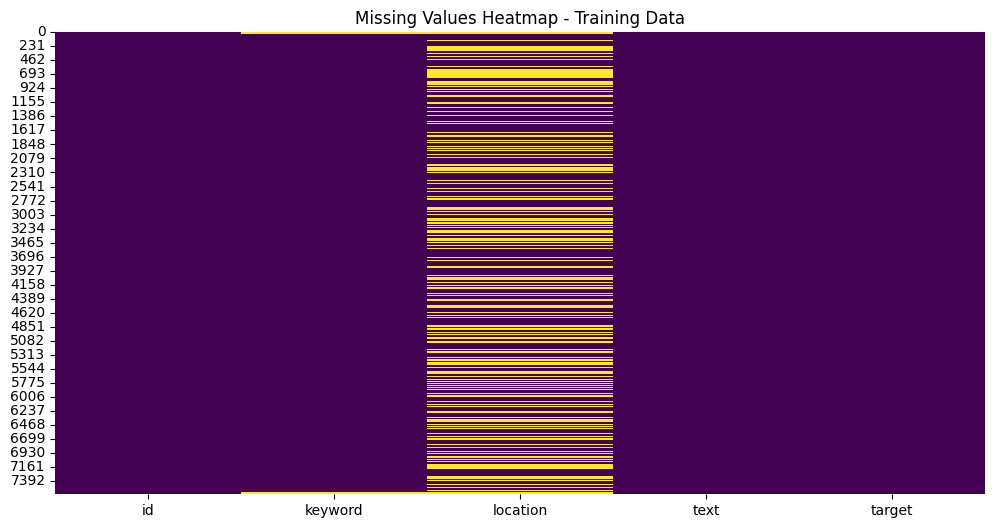

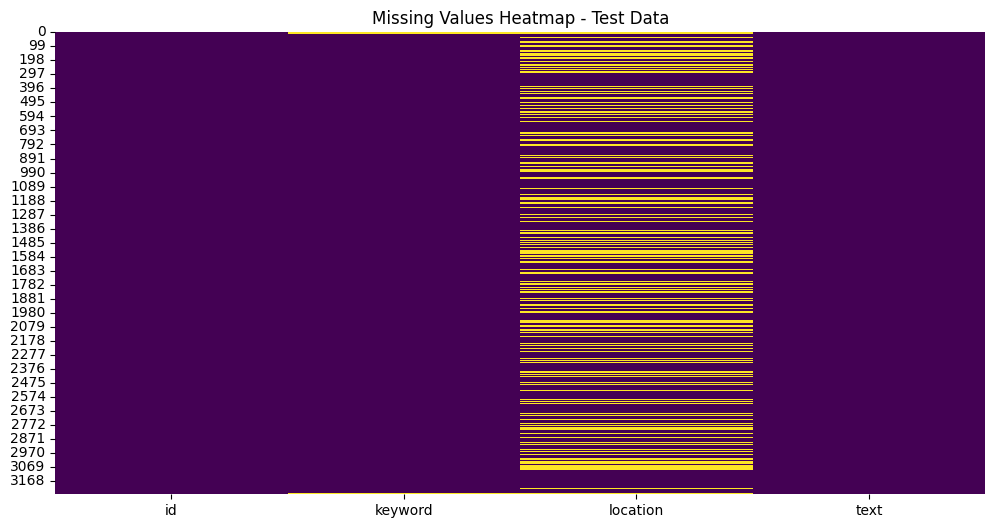

In [36]:
import seaborn as sns

plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Training Data')
plt.show()

plt.figure(figsize=(12,6))
sns.heatmap(test.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap - Test Data')
plt.show()

In [37]:
def escape_special_chars(text):
    """
    Escapes special characters that matplotlib might interpret as LaTeX symbols.
    Currently handles the dollar sign ('$'), but can be extended for other characters.
    """
    if pd.isnull(text):
        return text  # Return as is if NaN
    # Escape the dollar sign
    text = text.replace('$', '\\$')
    # Add more replacements here if needed
    return text

# Apply the function to create a cleaned 'location_clean' column
train['location_clean'] = train['location'].apply(escape_special_chars)
test['location_clean'] = test['location'].apply(escape_special_chars)

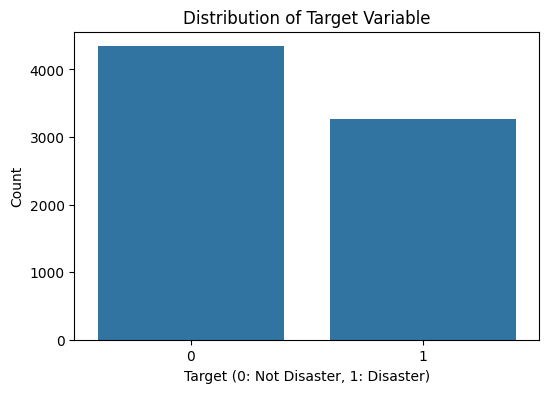

In [38]:
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=train)
plt.title('Distribution of Target Variable')
plt.xlabel('Target (0: Not Disaster, 1: Disaster)')
plt.ylabel('Count')
plt.show()

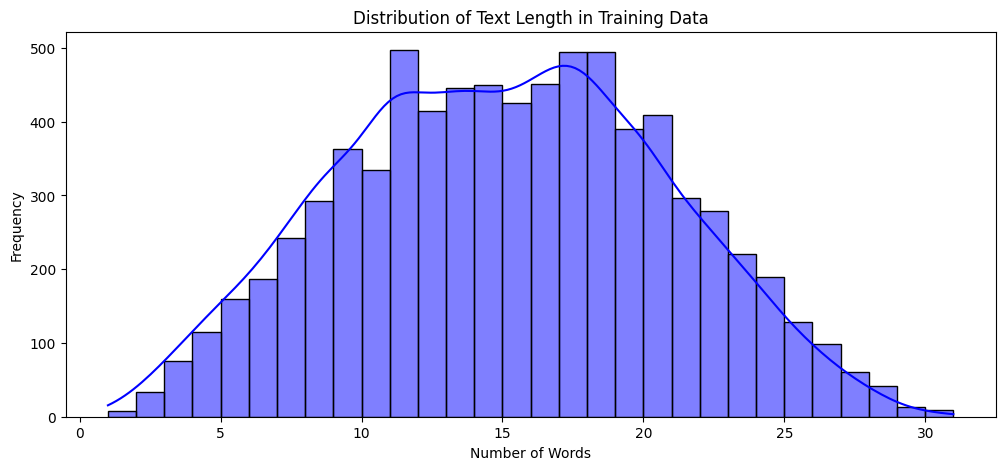

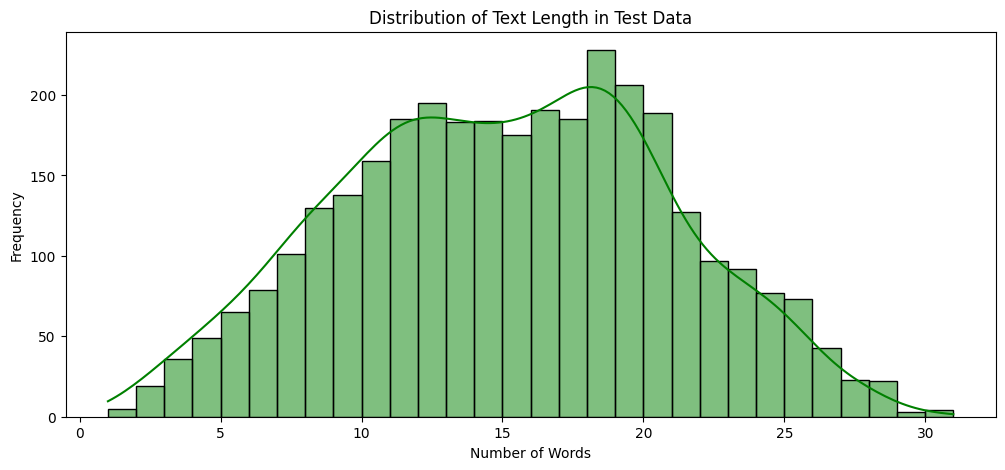

In [44]:
def text_length(text):
    return len(str(text).split())

train['text_length'] = train['text'].apply(text_length)
test['text_length'] = test['text'].apply(text_length)

plt.figure(figsize=(12,5))
sns.histplot(train['text_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Text Length in Training Data')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(test['text_length'], bins=30, kde=True, color='green')
plt.title('Distribution of Text Length in Test Data')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

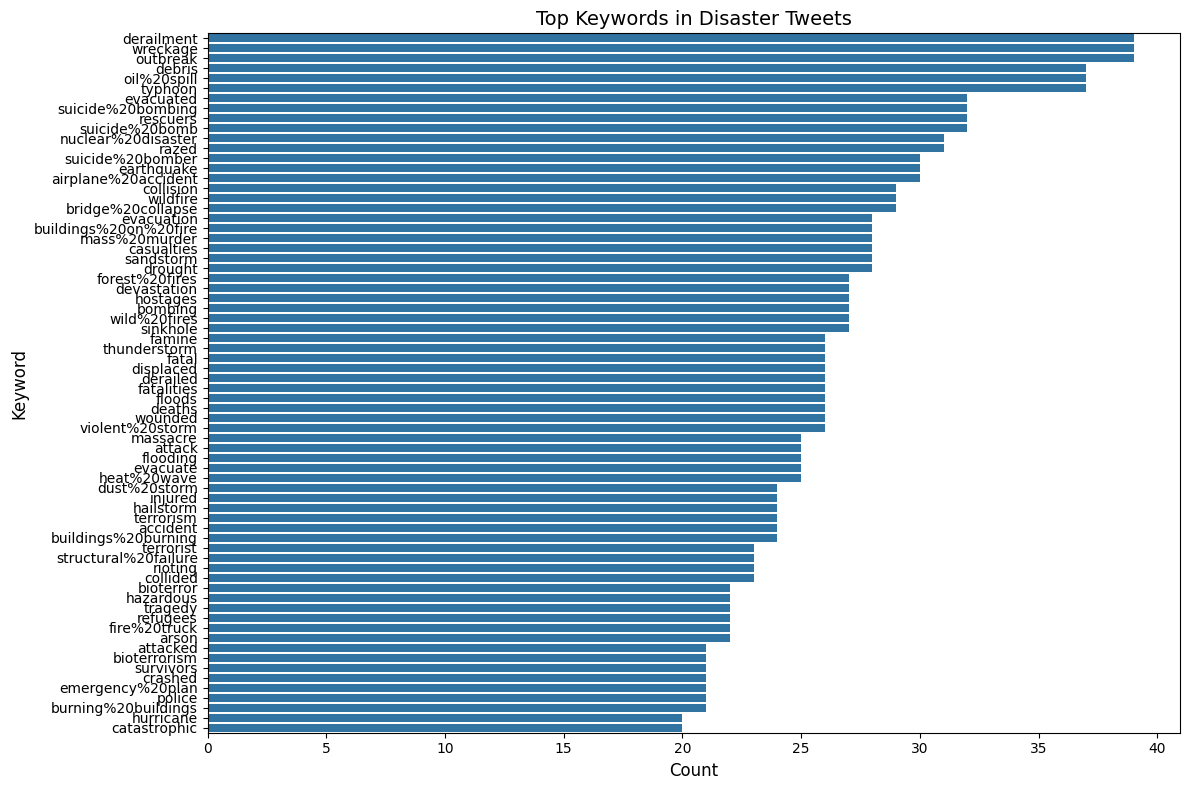

In [45]:
# Since 'keyword' has missing values, focus on non-null keywords
keywords = train['keyword'].dropna()

# Limit to top 20 keywords
top_keywords = train[train['target'] == 1]['keyword'].value_counts().head(70).index

plt.figure(figsize=(12,8))
sns.countplot(y='keyword', data=train[train['target'] == 1][train['keyword'].isin(top_keywords)], 
              order=top_keywords)
plt.title('Top Keywords in Disaster Tweets', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Keyword', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


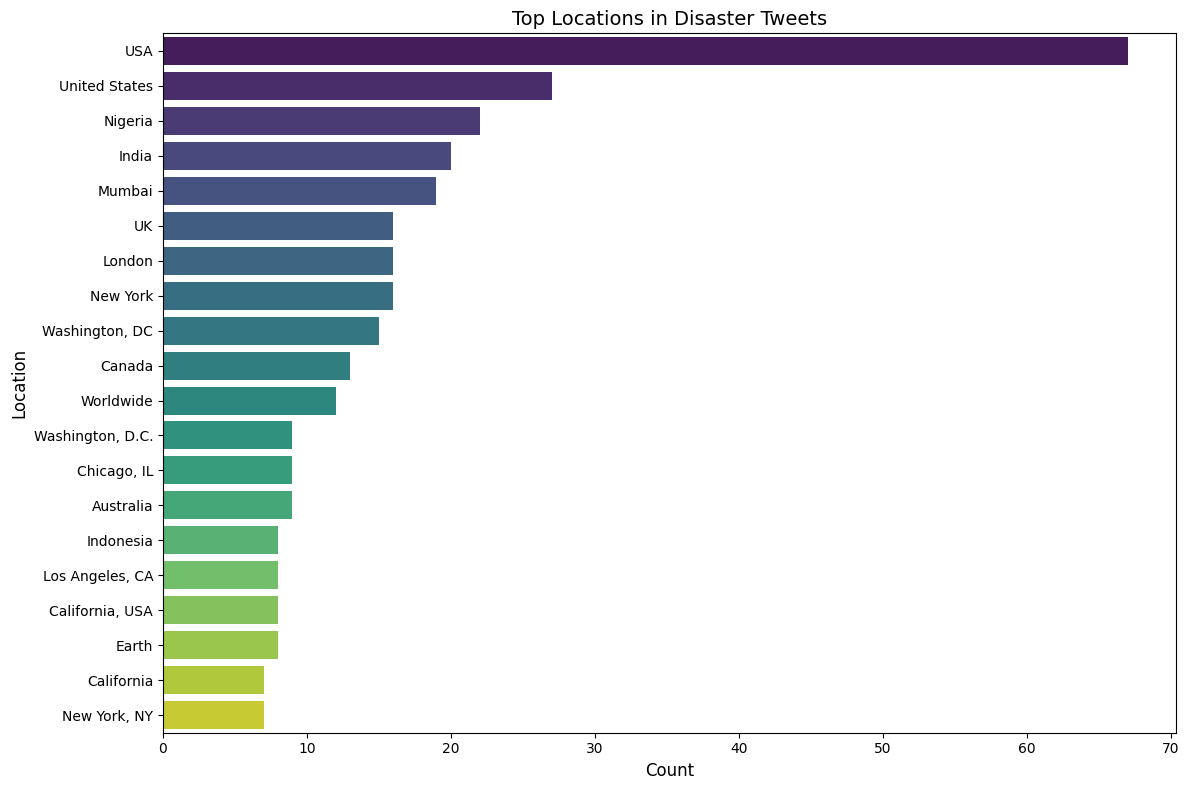

In [49]:
plt.figure(figsize=(12,8))
# Limit to top 20 locations
top_locations = train[train['target'] == 1]['location_clean'].value_counts().head(20).index

# Create the count plot using the cleaned 'location_clean' column
sns.countplot(
    y='location_clean',
    data=train[train['target'] == 1][train['location_clean'].isin(top_locations)],
    order=top_locations,
    palette='viridis'
)
plt.title('Top Locations in Disaster Tweets', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [47]:
# word_count
train['word_count'] = train['text'].apply(lambda x: len(str(x).split()))
test['word_count'] = test['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
train['unique_word_count'] = train['text'].apply(lambda x: len(set(str(x).split())))
test['unique_word_count'] = test['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
train['stop_word_count'] = train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
test['stop_word_count'] = test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# url_count
train['url_count'] = train['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
test['url_count'] = test['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
train['mean_word_length'] = train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
test['mean_word_length'] = test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    
# char_count
train['char_count'] = train['text'].apply(lambda x: len(str(x)))
test['char_count'] = test['text'].apply(lambda x: len(str(x)))
    
# punctuation_count
train['punctuation_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
test['punctuation_count'] = test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
    
# hashtag_count
train['hashtag_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
test['hashtag_count'] = test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
    
# mention_count
train['mention_count'] = train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
test['mention_count'] = test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))


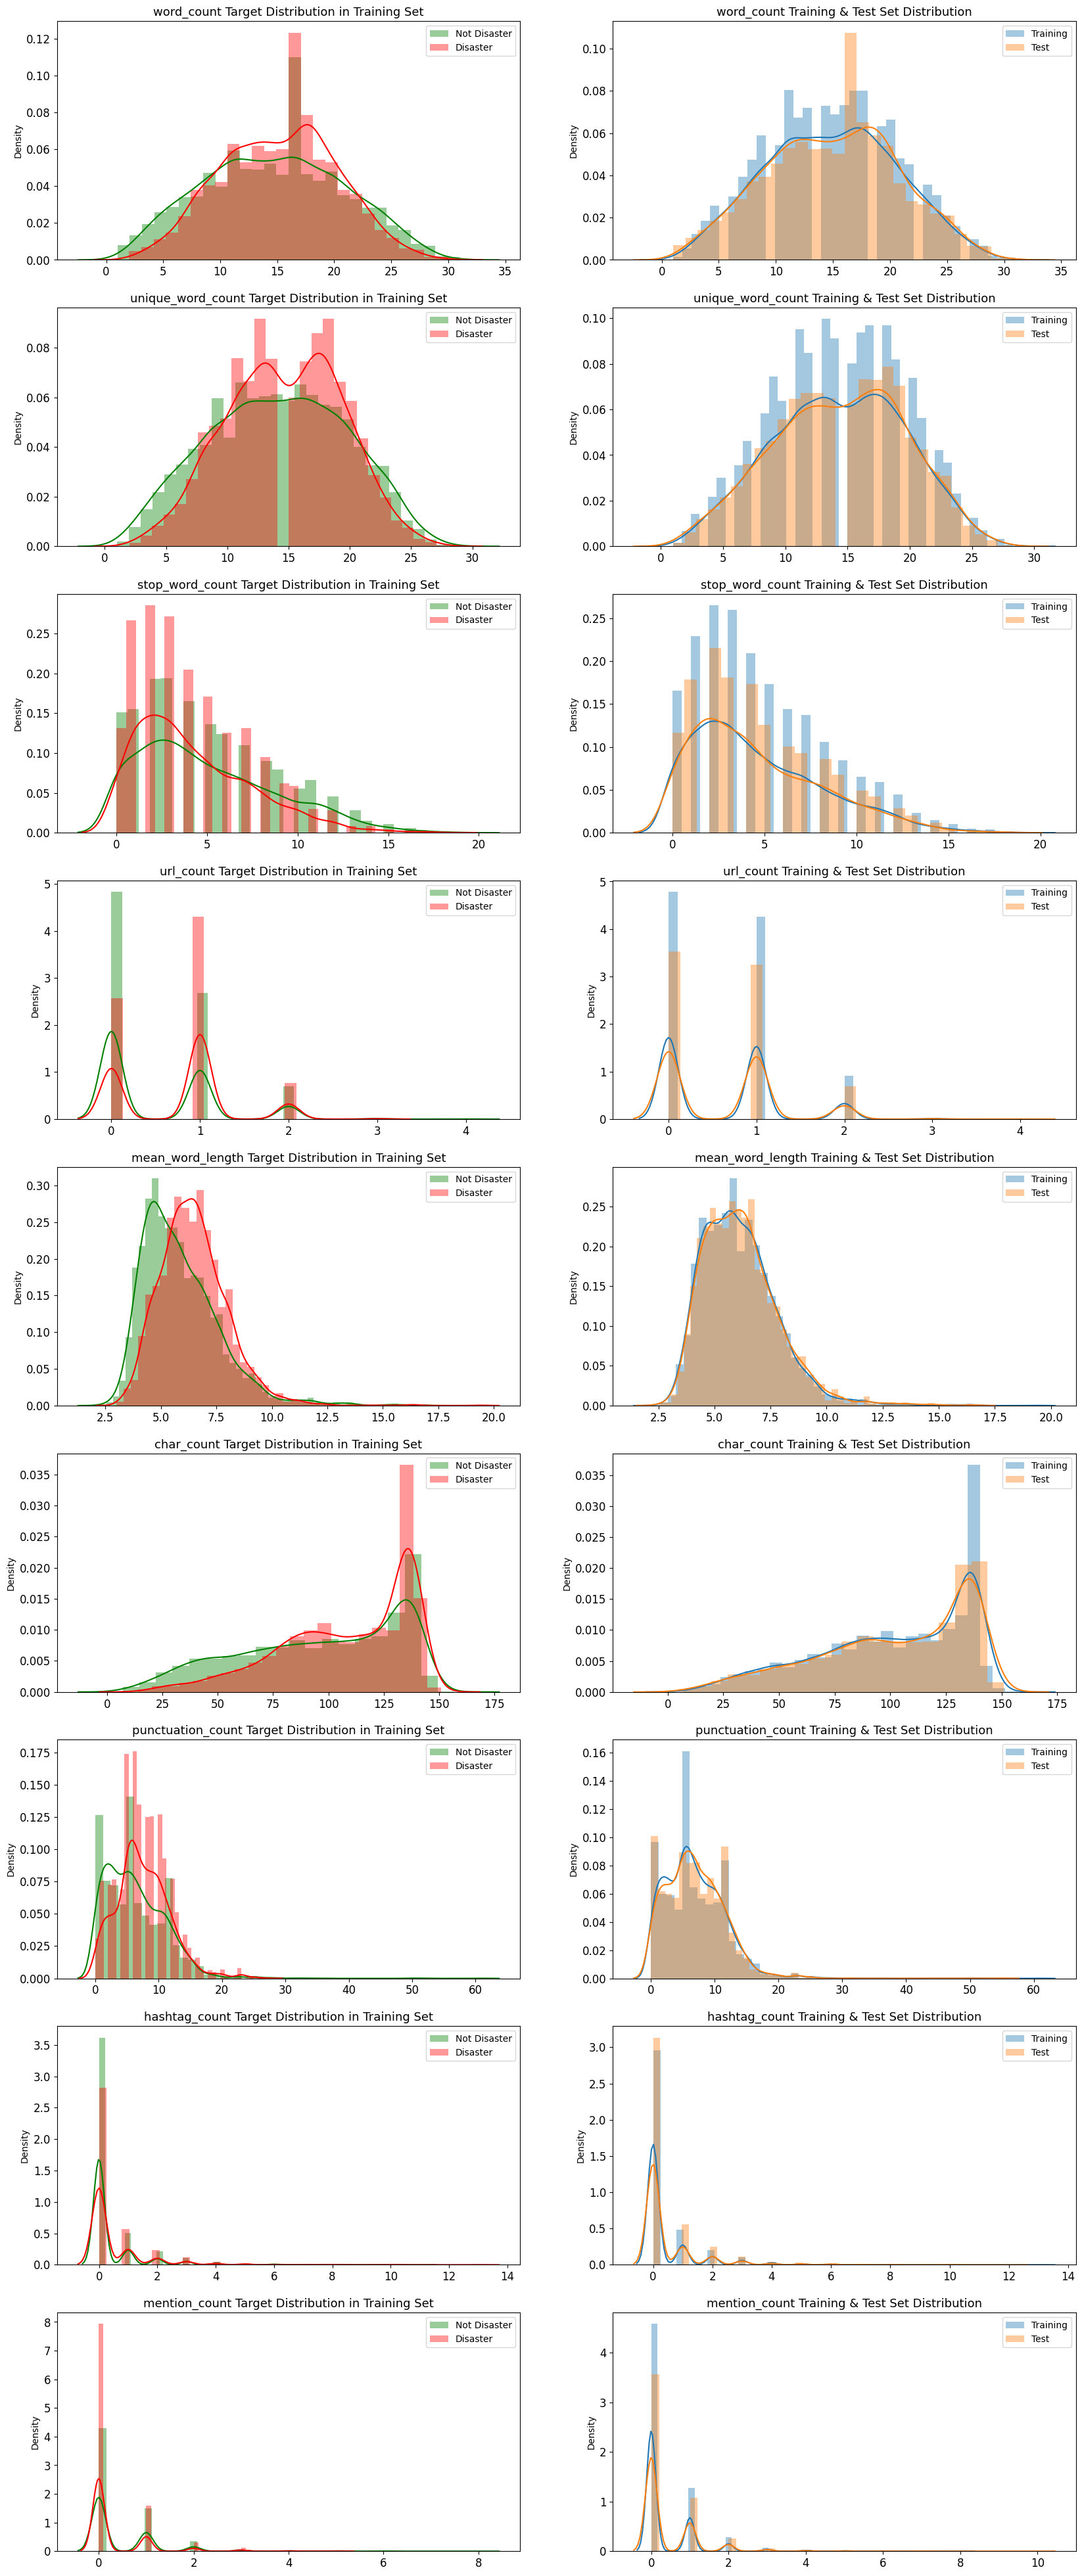

In [48]:
METAFEATURES = ['word_count', 'unique_word_count', 'stop_word_count', 'url_count', 'mean_word_length',
                'char_count', 'punctuation_count', 'hashtag_count', 'mention_count']
DISASTER_TWEETS = train['target'] == 1

fig, axes = plt.subplots(ncols=2, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    sns.distplot(train.loc[~DISASTER_TWEETS][feature], label='Not Disaster', ax=axes[i][0], color='green')
    sns.distplot(train.loc[DISASTER_TWEETS][feature], label='Disaster', ax=axes[i][0], color='red')

    sns.distplot(train[feature], label='Training', ax=axes[i][1])
    sns.distplot(test[feature], label='Test', ax=axes[i][1])
    
    for j in range(2):
        axes[i][j].set_xlabel('')
        axes[i][j].tick_params(axis='x', labelsize=12)
        axes[i][j].tick_params(axis='y', labelsize=12)
        axes[i][j].legend()
    
    axes[i][0].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)
    axes[i][1].set_title(f'{feature} Training & Test Set Distribution', fontsize=13)

plt.show()



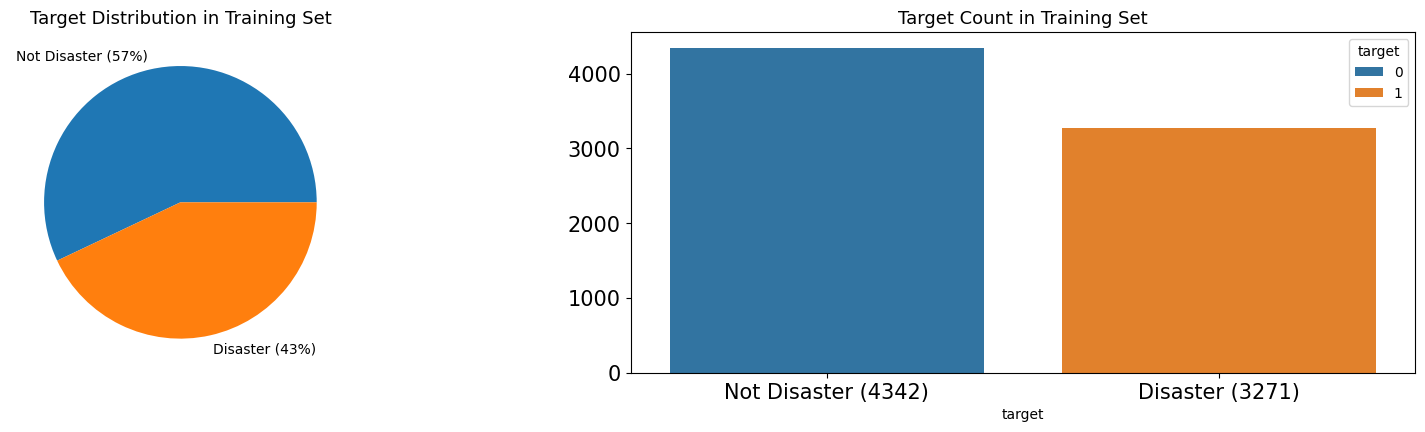

In [15]:


fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

train.groupby('target').count()['id'].plot(kind='pie', ax=axes[0], labels=['Not Disaster (57%)', 'Disaster (43%)'])
sns.countplot(x=train['target'], hue=train['target'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Not Disaster (4342)', 'Disaster (3271)'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in Training Set', fontsize=13)
axes[1].set_title('Target Count in Training Set', fontsize=13)

plt.show()



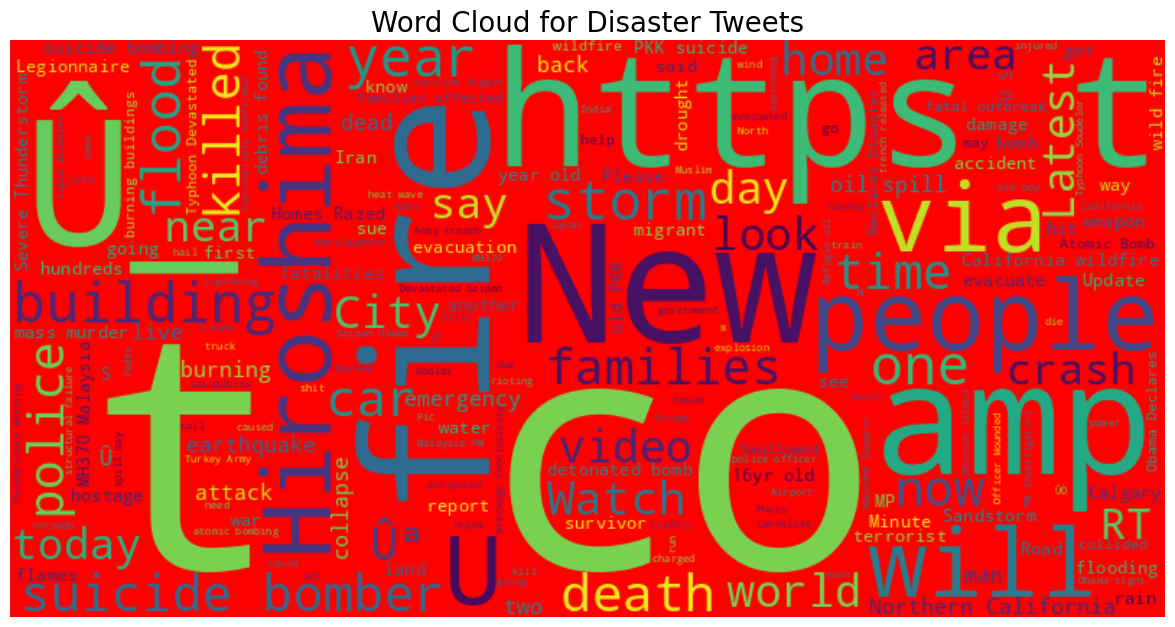

In [50]:
from wordcloud import WordCloud

# Combine all texts for disaster and non-disaster tweets
disaster_text = " ".join(train[train['target']==1]['text'].astype(str))
nondisaster_text = " ".join(train[train['target']==0]['text'].astype(str))

# Generate Word Cloud for Disaster Tweets
wordcloud_disaster = WordCloud(stopwords=STOPWORDS, background_color='red', width=800, height=400).generate(disaster_text)

plt.figure(figsize=(15,7.5))
plt.imshow(wordcloud_disaster, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Disaster Tweets', fontsize=20)
plt.show()

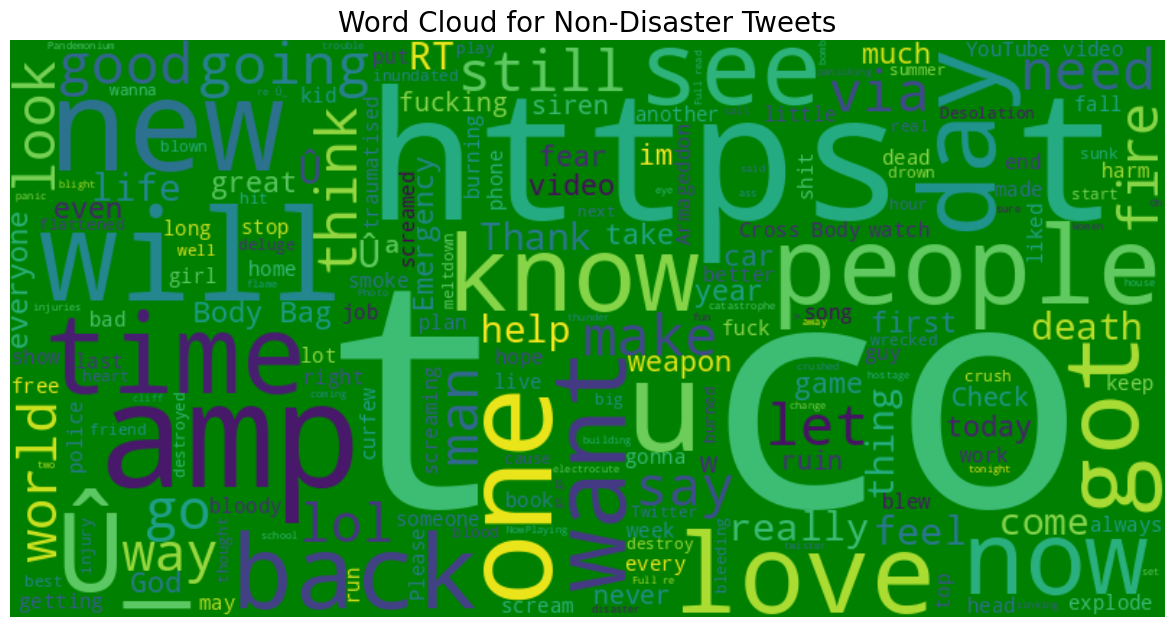

In [51]:
wordcloud_nondisaster = WordCloud(stopwords=STOPWORDS, background_color='green', width=800, height=400).generate(nondisaster_text)

plt.figure(figsize=(15,7.5))
plt.imshow(wordcloud_nondisaster, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Disaster Tweets', fontsize=20)
plt.show()

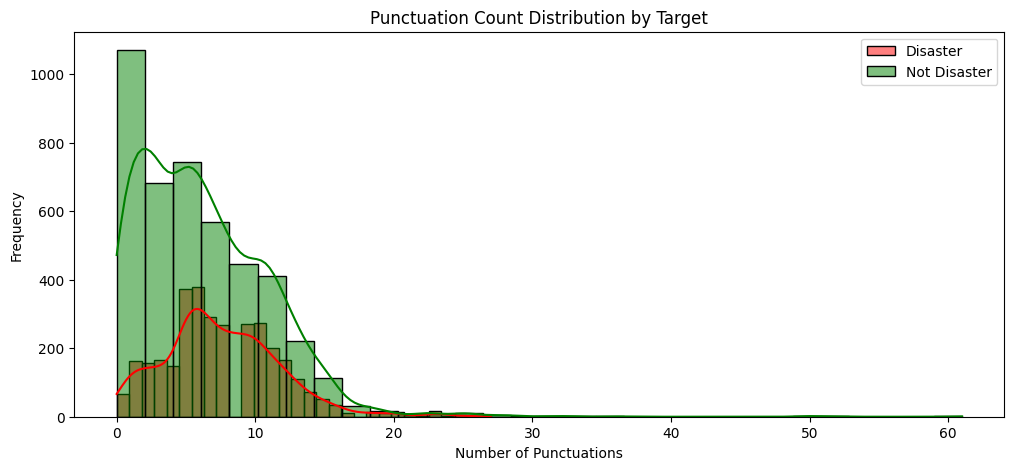

In [52]:
def count_punctuations(text):
    return len([c for c in str(text) if c in string.punctuation])

train['punctuation_count'] = train['text'].apply(count_punctuations)
test['punctuation_count'] = test['text'].apply(count_punctuations)

plt.figure(figsize=(12,5))
sns.histplot(train[train['target']==1]['punctuation_count'], bins=30, kde=True, color='red', label='Disaster')
sns.histplot(train[train['target']==0]['punctuation_count'], bins=30, kde=True, color='green', label='Not Disaster')
plt.title('Punctuation Count Distribution by Target')
plt.xlabel('Number of Punctuations')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import os

In [63]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
samp = pd.read_csv('sample_submission.csv')

In [64]:
def clean_text(text):
    """
    Cleans the input text by performing the following operations:
    - Converts text to lowercase.
    - Removes URLs, mentions, hashtags.
    - Removes punctuation and non-alphabetic characters.
    - Removes extra spaces.
    """
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'[^a-z\s]', '', text) # Remove punctuation and non-alphabetic characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply cleaning function to the 'text' column
train['clean_text'] = train['text'].apply(clean_text)
test['clean_text'] = test['text'].apply(clean_text)


In [65]:
# Parameters
MAX_NUM_WORDS = 10000  # Maximum number of words to keep, based on word frequency
MAX_SEQUENCE_LENGTH = 100  # Maximum length of all sequences

# Initialize the Tokenizer
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(train['clean_text'])

# Convert texts to sequences
X_train_sequences = tokenizer.texts_to_sequences(train['clean_text'])
X_test_sequences = tokenizer.texts_to_sequences(test['clean_text'])

# Pad sequences to ensure uniform length
X_train_padded = pad_sequences(X_train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post', truncating='post')

# Prepare the target variable
y = train['target'].values

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train_padded, y, test_size=0.2, random_state=42, stratify=y
)

In [66]:
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test_padded.shape}")

Training set size: (6090, 100)
Validation set size: (1523, 100)
Test set size: (3263, 100)


In [67]:
# --- Building the Sequential Neural Network Model ---

model = Sequential([
    Embedding(input_dim=MAX_NUM_WORDS,
              output_dim=128,  # Dimension of the embedding vectors
              input_length=MAX_SEQUENCE_LENGTH),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.5),
    LSTM(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# --- Compile the Model ---

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# --- Model Summary ---
model.summary()

I0000 00:00:1726677379.214676  637041 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726677379.231911  637041 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726677379.231947  637041 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726677379.235507  637041 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1726677379.235542  637041 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [71]:
# --- Define Callbacks ---

# Early Stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Model Checkpoint to save the best model with '.keras' extension
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# --- Train the Model ---

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/20


2024-09-18 13:01:49.371125: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8902


48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 107ms/step - accuracy: 0.5385 - loss: 0.6873 - val_accuracy: 0.5706 - val_loss: 0.6832
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.5564 - loss: 0.6864 - val_accuracy: 0.5706 - val_loss: 0.6835
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.5626 - loss: 0.6880 - val_accuracy: 0.5706 - val_loss: 0.6840
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 100ms/step - accuracy: 0.5711 - loss: 0.6841 - val_accuracy: 0.5706 - val_loss: 0.6838


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.57      1.00      0.73       869
           1       0.00      0.00      0.00       654

    accuracy                           0.57      1523
   macro avg       0.29      0.50      0.36      1523
weighted avg       0.33      0.57      0.41      1523



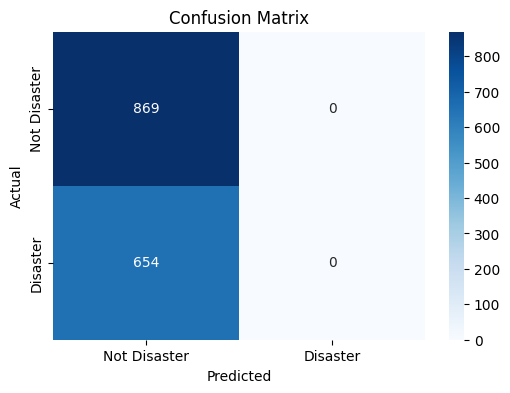

In [75]:
# --- Load the Best Model ---
from tensorflow.keras.models import load_model

best_model = load_model('best_model.keras')

# --- Predictions on Validation Set ---
y_pred_prob = best_model.predict(X_val)
y_pred = (y_pred_prob > 0.5).astype(int).reshape(-1)

# --- Classification Report ---
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_val, y_pred))

# --- Confusion Matrix ---
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Disaster', 'Disaster'],
            yticklabels=['Not Disaster', 'Disaster'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Experiment 1: Increasing LSTM Units

In [76]:
# --- Building a Model with More LSTM Units ---

model_exp1 = Sequential([
    Embedding(input_dim=MAX_NUM_WORDS,
              output_dim=128,  # Dimension of the embedding vectors
              input_length=MAX_SEQUENCE_LENGTH),
    Bidirectional(LSTM(256, return_sequences=True)),
    Dropout(0.5),
    LSTM(128),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# --- Compile the Model ---

model_exp1.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# --- Train the Experiment Model ---

history_exp1 = model_exp1.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 145ms/step - accuracy: 0.5570 - loss: 0.6896 - val_accuracy: 0.5706 - val_loss: 0.6834
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.5599 - loss: 0.6864 - val_accuracy: 0.5706 - val_loss: 0.6832
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 135ms/step - accuracy: 0.5839 - loss: 0.6813 - val_accuracy: 0.5706 - val_loss: 0.6833
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - accuracy: 0.5763 - loss: 0.6845 - val_accuracy: 0.5706 - val_loss: 0.6834
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 139ms/step - accuracy: 0.5757 - loss: 0.6843 - val_accuracy: 0.5706 - val_loss: 0.6846


# Adding Bidirectional GRU Layers

In [77]:
# --- Building a Model with Bidirectional GRU Layers ---

from tensorflow.keras.layers import GRU

model_exp2 = Sequential([
    Embedding(input_dim=MAX_NUM_WORDS,
              output_dim=128,
              input_length=MAX_SEQUENCE_LENGTH),
    Bidirectional(GRU(128, return_sequences=True)),
    Dropout(0.5),
    GRU(64),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# --- Compile the Model ---

model_exp2.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# --- Train the Experiment Model ---

history_exp2 = model_exp2.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.5616 - loss: 0.6875 - val_accuracy: 0.5706 - val_loss: 0.6846
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 90ms/step - accuracy: 0.5630 - loss: 0.6856 - val_accuracy: 0.5706 - val_loss: 0.6832
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.5732 - loss: 0.6845 - val_accuracy: 0.5706 - val_loss: 0.6848


# Experiment 3: Adjusting Dropout Rates

In [78]:
# --- Building a Model with Adjusted Dropout Rates ---

model_exp3 = Sequential([
    Embedding(input_dim=MAX_NUM_WORDS,
              output_dim=128,
              input_length=MAX_SEQUENCE_LENGTH),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# --- Compile the Model ---

model_exp3.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# --- Train the Experiment Model ---

history_exp3 = model_exp3.fit(
    X_train, y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.5658 - loss: 0.6866 - val_accuracy: 0.5706 - val_loss: 0.6856
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - accuracy: 0.5699 - loss: 0.6863 - val_accuracy: 0.5706 - val_loss: 0.6832
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.5610 - loss: 0.6874 - val_accuracy: 0.5706 - val_loss: 0.6852


# Comparative Analysis of Experiments

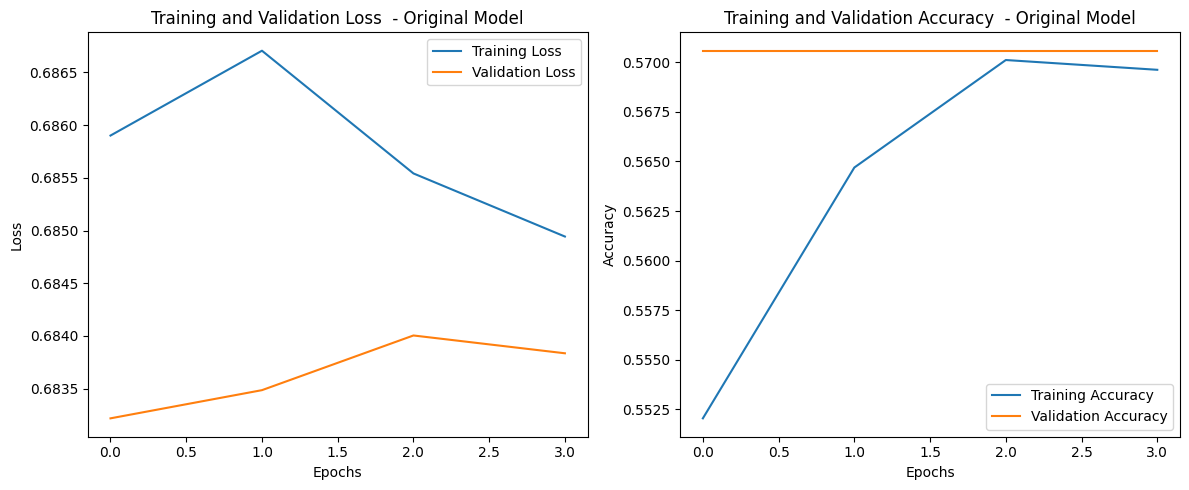

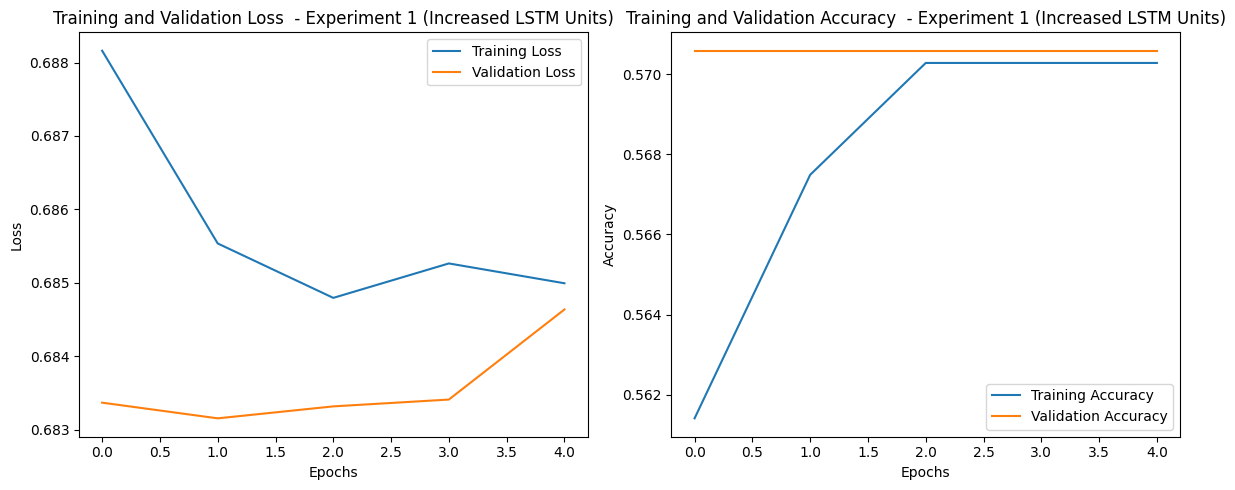

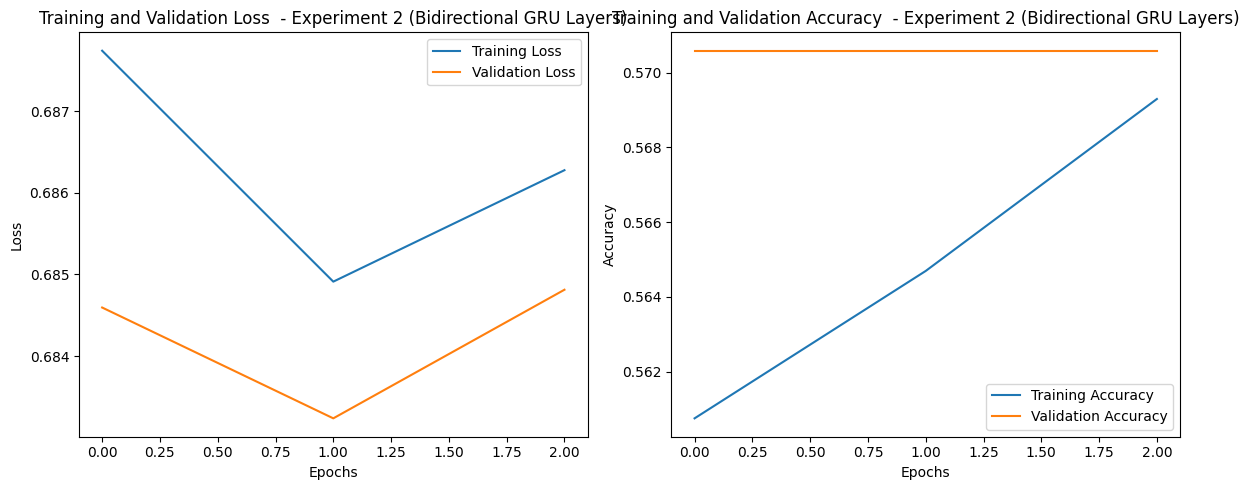

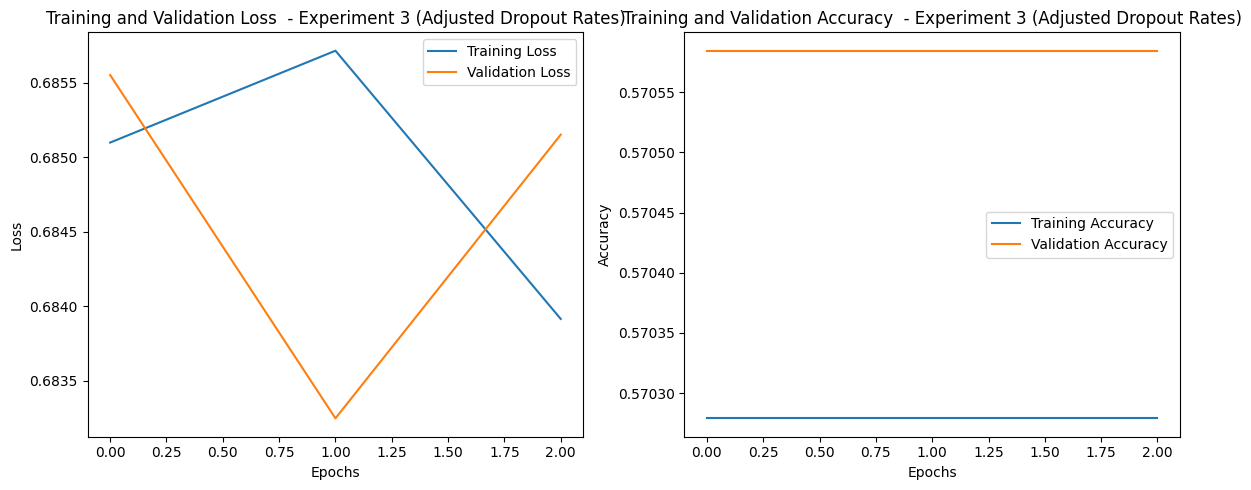

In [79]:
# --- Function to Plot Training History ---

def plot_history(history, title_suffix=''):
    # Loss Plot
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training and Validation Loss {title_suffix}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Accuracy Plot
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy {title_suffix}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# --- Plot Histories for All Models ---

plot_history(history, ' - Original Model')
plot_history(history_exp1, ' - Experiment 1 (Increased LSTM Units)')
plot_history(history_exp2, ' - Experiment 2 (Bidirectional GRU Layers)')
plot_history(history_exp3, ' - Experiment 3 (Adjusted Dropout Rates)')


In [80]:
# --- Final Model Selection ---

# Assuming Experiment 1 was the best
final_model = model_exp1

# --- Load the Best Weights ---
final_model.load_weights('best_model.keras')

# --- Predictions on the Test Set ---
y_test_pred_prob = final_model.predict(X_test_padded)
y_test_pred = (y_test_pred_prob > 0.5).astype(int).reshape(-1)

# --- Prepare Submission File ---
submission = pd.DataFrame({
    'id': test['id'],
    'target': y_test_pred
})

submission.to_csv('submission.csv', index=False)
print("Submission file 'submission.csv' created successfully.")


102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step
Submission file 'submission.csv' created successfully.
